<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_impl%C3%ADcito_de_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=9> Ecuación del Calor. Método implícito de Crank-Nicolson </font>

----

<font size=4 color="tomato">
Resolver el problema propuesto en la imagen adjunta usando el método de Crank-Nicolson.</font>


<font size=2> $$u_{i,j+1} - u_{i,j} = \frac{1}{2} \left[ \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2} \right]$$

<font size=2>$$u_{i,j+1} = r(u_{i-1,j}) + (1 - 2r)u_{i,j} + r(u_{i+1,j})$$



In [732]:
# Librerias
import sympy as sp
import numpy as np
import tabulate
from tabulate import tabulate

<font size=3> Use <font color="tomato">$h = 1/10$ </font>

In [345]:
h=1/10

<font size=3>Escriba un programa en JupyterNotebook (google colab) que implemente el método de Crank-Nicolson usando la librería sympy y basándose en la notebook proporcionada en la tarea anterior.

---
<font size=3>Definimos un metodo que nos regresa la Matriz tridiagonal <font size=3 color="tomato">$A$ </font>

<font size=3>Definimos un metodo que nos regresa la Matriz <font size=3 color="tomato">$b$ </font>

<font size=3>Definimos la función <font color="tomato">$g(x)$</font>, que nos regresara el valor de <font color="tomato">$x$</font> evaluado en <font color="tomato">$1-4(x-1/2)^2$</font>

In [117]:
def amatriz(n,dp,ds):
  A_np = sp.Matrix(                          # Creamos la matriz con sp, para que tenga el mismo formato
        np.diag(np.full(n, dp)) +          # Indicamos que la diagonal principal sean 3, 9x3
        np.diag(np.full(n-1, ds), k=1) +   # Indicamos que la diagonal superior sean -1, 8x1
        np.diag(np.full(n-1, ds), k=-1))   # Indicamos que la diagonal inferior sean -1, 8x1
  return(A_np)

def bmatriz(f,nb):
  b2 = sp.Matrix([f(0.1*(i+1)) for i in range(nb)])   # Creamos una Matriz con los valores de la f(i+1)
  return(b2)

def g(x):
  return(1-(4*(x-1/2)**2))

<font size=3>Definimos la función <font color="tomato">Crank-Nicolson</font>, que nos regresara la matriz <font color="tomato">$S$</font>, que contiene todos los valores de las <font color="tomato">$j$</font> iteraciones.

In [775]:
def crank_nicolson(A, B, b, j):     # Creamos un metodo para Crank-Nicolson
    b_1 = B*b                       # Guardamos la solucion en un vector b_1
    S = []                          # Creamos un vector vacio

    for i in range(j):              # Iniciamos un for para las iteraciones j
        sol = A.LUsolve(b_1)        # Guardamos la "nueva" solucion en una variable
        S.append(sol.T)             # Agregamos la solucion a un vector S
        b_1 = B*sol                 # Guardamos la solucion en b_1, para la sig iteracion

        _ = None                    # Guardamos la solucion en una variable

    return sp.Matrix(S)             # Regresamos el vector S, que contiene todas las soluciones

<font size=3>La Forma Matricial de Crank-Nicolson

<p>
\begin{equation*}
\begin{pmatrix}
2+2r & -r & 0 & \dots & 0 \\
-r & 2+2r & -r & \dots & 0 \\
0 & -r & 2+2r & \dots & 0 \\
\vdots & \vdots & \vdots & & -r \\
0 & 0 & 0 & -r & 2+2r
\end{pmatrix}
\begin{pmatrix}
u_{1,j} \\
u_{2,j} \\
\vdots \\
u_{m-2,j} \\
u_{m-1,j}
\end{pmatrix}
=
\begin{pmatrix}
2-2r & r & 0 & \dots & 0 \\
r & 2-2r & r & \dots & 0 \\
0 & r & 2-2r & \dots & 0 \\
\vdots & \vdots & \vdots & & r \\
0 & 0 & 0 & r & 2-2r
\end{pmatrix}
\begin{pmatrix}
u_{1,j-1} \\
u_{2,j-1} \\
\vdots \\
u_{m-2,j-1} \\
u_{m-1,j-1}
\end{pmatrix}
\end{equation*}
</p><p>
<font size=3>Calculamos el valor de <font color="tomato">$r$</font>, asi podemos contruir las matrices

In [695]:
# Calculamos el valor de r
k=0.01
r=k/(h**2)
print(r)
# Dado que r=1, se simplifican calculos

0.9999999999999998


<font size=4 color="tomato">Ejercicio 1: </font>

<font size=3> <p>Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto.</p><p>
Observe hasta que valor de t llega.</p><p>
Use la librería tabulate.</font>

----


In [697]:
#Valores de inicio
n=9     # Tamaño de la Matriz
j = 100 # Número de pasos

<font size=3>Matriz <font size=3 color="tomato">$A$</font><font size=3> usando Sympy

---

<font size=2 color="red"> $n$ </font><font size=2>el tamaño de la matriz

<font size=2 color="red"> $2r+2$ </font><font size=2>donde $r=1$ resulta en $2+2=$<font size=2 color="red">$4$

<font size=2 color="red"> $-r$ </font><font size=2>donde $r=1$ resulta en <font size=2 color="red">$-1$

In [717]:
A=amatriz(n,4,-1)             # Creamos la Matriz A
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

<font size=3>Matriz <font size=3 color="tomato">$b$</font><font size=3> usando Sympy

---

<font size=2 color="red"> $n$ </font><font size=2>el tamaño de la matriz

<font size=2 color="red"> $sp.zeros$ </font><font size=2>ya que se indica que sus valores son cero

In [718]:
b=sp.zeros(n, 1)  # Creamos la Matriz b, la asociciada a A
b

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

<font size=3>Matriz <font size=3 color="tomato">$A_2$</font><font size=3> usando Sympy

---

<font size=2 color="red"> $n$ </font><font size=2>el tamaño de la matriz

<font size=2 color="red"> $-2r+2$ </font><font size=2>donde $r=1$ resulta en $-2+2=$<font size=2 color="red">$0$

<font size=2 color="red"> $r$ </font><font size=2>donde $r=1$ resulta en <font size=2 color="red">$1$

In [719]:
A2=amatriz(n,0,1)             # Creamos la Matriz A_2
A2

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

<font size=3>Matriz <font size=3 color="tomato">$b_2$</font><font size=3> usando Sympy

---

<font size=2 color="red"> $n$ </font><font size=2>el tamaño de la matriz

<font size=2 color="red"> $g$ </font><font size=2>es la funcion en la que se evaluan los valores de <font size=2 color="red"> $0.1*n$

In [720]:
b2=bmatriz(g,n)   # Creamos la Matriz b2, la asociciada a A_2
b2

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

<font size=3>Matriz <font size=3 color="tomato">$U$</font><font size=3> usando el método Crank–Nicolson y con formato de Sympy

In [782]:
U = crank_nicolson(A, A2, b2, j) # Ejecutamos el método Crank–Nicolson
#U

---
<font size=2 color="blue">Observe hasta que valor de t llega.</p>

---


In [778]:
len(U)                           # Longitud de la matriz U
print(U[891:900])                # Imprimimos los ultimos valores de la matriz U

[1.77455137412959e-5, 3.37539729573293e-5, 4.64583581225410e-5, 5.46150755003036e-5, 5.74256887624902e-5, 5.46150755003037e-5, 4.64583581225410e-5, 3.37539729573293e-5, 1.77455137412959e-5]


---
<font size=2 color="blue">Use la librería tabulate.</p>

---

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$list(U.row(i))$ </font>Creamos una lista con las filas

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$data$ </font> Guarda la lista de datos

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$tablefmt$$ </font> Es el formato de la tabla, en este caso "grid" crea unos bordes sencillos, y "heavy_grid" crea unos borde gruesos

In [779]:
data = [list(U.row(i)) for i in range(5)]  # Creamos una lista con los (primeros 5) datos de U (el método Crank–Nicolson)
print(tabulate(data, tablefmt="grid"))     # Imprimimos los datos

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [788]:
# Modificamos la matriz U, para añadir "titulos"
Ux=sp.zeros(j+2,int(n/2)+3)                   # Creamos una matriz de ceros
for i in range(j):                            # Iniciamos un for al rango de las iteraciones del método Crank–Nicolson
  Ux[i+2,0]=0.01*(i+1)                        # Cambiamos la primer columna por los valores de t
  for k in range(int(n/2)+1):                 # Iniciamos otro for al rango de valores en x (llegamos a la mitad, porqué los demas son iguales)
    s=(k+1)*0.1                               # Creamos los valores en x
    Ux[0,k+2]=(f"{s:.2f}")                    # Ponemos los valores de x=0, x=0.1
    Ux[1,k+2]=g(s)                            # Ponemos el primer valor de x_0
    Ux[i+2,k+2]=U[i,k]                        # Ponemos las demas iteraciones en U

#data = [list(Ux.row(i)) for i in range(j+2)] # Guardamos todos los datos en uns lista
data = [list(Ux.row(i)) for i in range(12)]   # Guardamos los datos en uns lista
data[0][0]="t"                                # Insertamos la t, en el lugar [0,0]
data[0][1]="x=0"                              # Insertamos x=0, en el lugar [0,1]

---
<font size=2 color="blue">Obtenga una tabla similar a la tabla 2.6, use esta para verificar que su código es correcto.</font>

---



In [789]:
print(tabulate(data, tablefmt="heavy_grid"))  # Imprimimos los datos modificados

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ t                  ┃ x=0 ┃ 0.1      ┃ 0.2      ┃ 0.3      ┃ 0.4      ┃ 0.5      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━┫
┃ 0                  ┃ 0   ┃ 0.36     ┃ 0.64     ┃ 0.84     ┃ 0.96     ┃ 1        ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━┫
┃ 0.0100000000000000 ┃ 0   ┃ 0.301436 ┃ 0.565746 ┃ 0.761547 ┃ 0.880442 ┃ 0.920221 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━┫
┃ 0.0200000000000000 ┃ 0   ┃ 0.26763  ┃ 0.504776 ┃ 0.688489 ┃ 0.802994 ┃ 0.841718 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━┫
┃ 0.0300000000000000 ┃ 0   ┃ 0.23989  ┃ 0.454784 ┃ 0.623126 ┃ 0.729952 ┃ 0.766473 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━┫
┃ 0.0400000000000000 ┃ 0   ┃ 0.21645  ┃ 0.411015 ┃ 0.564592 ┃ 0.662619 ┃ 0.6

<font size=3 color="tomato">Grafica

---
<font size=3>Graficamos el Mapa de colores </font>

<font size=3>Y la Solución de la ecuación del calor con Crank-Nicolson</font>

In [734]:
import matplotlib.pyplot as plt          # Importamos matplot
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm                # colormap

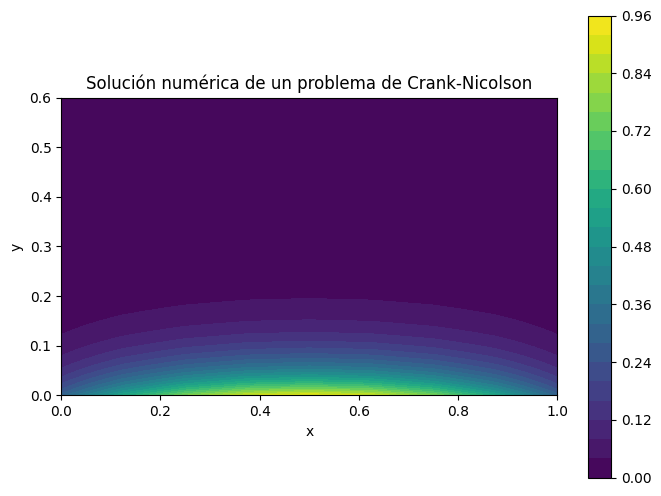

In [736]:
# Grafica
U_np = np.array(U.tolist(), dtype=float)                      # Convertimos la matriz U de Sympy a NumPy

# Codigo extraido de Github
x = np.linspace(0, 1, 9)                                      #Número de nodos internos en X
y = np.linspace(0, 0.6, j)                                    #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)
# Mapa de colores
plt.figure(figsize=(8, 6))                                    #Tamaño de la grafiica
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)                                         #Barra de colores
plt.title('Solución numérica de un problema de Crank-Nicolson')    #Titulo
plt.xlabel('x')                                               #Eje X
plt.ylabel('y')                                               #Eje Y
plt.gca().set_aspect('equal', adjustable='box')               #Aspecto de la grafica
plt.show()                                                    #Mostramos la grafica

La grafica aux. de colores, indica la temperatura en base al color, por lo que el amarillo, tiene un mayor a comparacion del morada.

Podemos observar que el calor se difusa en forma de ondas muy pronuncidas, por lo que, donde se produce el contacto, (la zona amarilla) esta aumentando su temperatura, mientras que las partes mas alejadas (la zona morada) permanecen con su temperatura inicial.

Numericamente implica que los valores en las partes con la misma distacia del centro x=0.5, tienen el mismo valor.

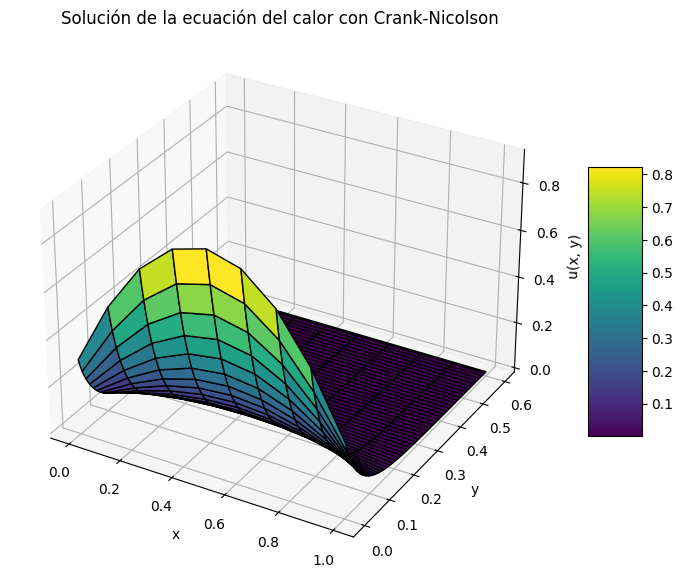

In [752]:
# Grafica 3D
# Codigo extraido de Github
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))                                     # Tamaño de la grafica
ax = fig.add_subplot(111, projection='3d')                            # Densidad de puntos
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')    # Colores de la superficie
ax.set_title('Solución de la ecuación del calor con Crank-Nicolson')  # Titulo
ax.set_xlabel('x')                                                    # Titulos en x
ax.set_ylabel('y')                                                    # Titulos en y
ax.set_zlabel('u(x, y)')                                              # Titulos en z
fig.colorbar(surf, shrink=0.5, aspect=5)                              # Barra de colores
plt.show()                                                            # Mostramos la grafica

La grafica aux. de colores, indica la temperatura en base al color, por lo que el amarillo, tiene un mayor a comparacion del morada.

Podemos observar que el calor se difusa en forma de ondas, por lo que, donde se produce el contacto, (la zona amarilla) esta aumentando su temperatura, mientras que las partes mas alejadas (la zona morada) permanecen con su temperatura inicial.

Numericamente implica que los valores en las partes a misma distacia del centro p(0.5,0,1) son iguales.

<font size=4 color="tomato">Ejercicio 2: </font>

<font size=4> <p>La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución.</p><p>
Use su código para graficar en un mismo panel su solución numérica y la solución real.</p><p>
Determine el error de su solución.</font>

----


In [753]:
# Variables
v_es=U_np[9]     # Los valores en x=0.1 (como incia en 0, el valore correspondiente a x=0 es 9)
v_ex=np.array([0.1189,0.2261,0.3112,0.3658,0.3847,0.3658,0.3112,0.2261,0.1189]) # Solución exacta para t = 0.10

---
<font size=2 color="blue">Use su código para graficar en un mismo panel su solución numérica y la solución real.</font>

---

Con matplotlib (<font color="red"> plt </font>) realizamos la grafica

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.figure() </font> Creamos un plano

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> figsize=() </font>  Indicamos el tamaño del plano

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.plot() </font>  Indicamos los puntos en X del valor esperado

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.plot() </font>  Indicamos los puntos en X del valor exacto

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.title() </font>  Asignamos un titulo ala grafica

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.xlabel() </font>  Asignamos un titulo al eje X

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.ylabel() </font>  Asignamos un titulo al eje Y

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.legend() </font> Mostramos el nombre y color de cada linea

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.grid() </font>  Mostramos la cuadricula

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red"> plt.show() </font>  Mostramos la grafica

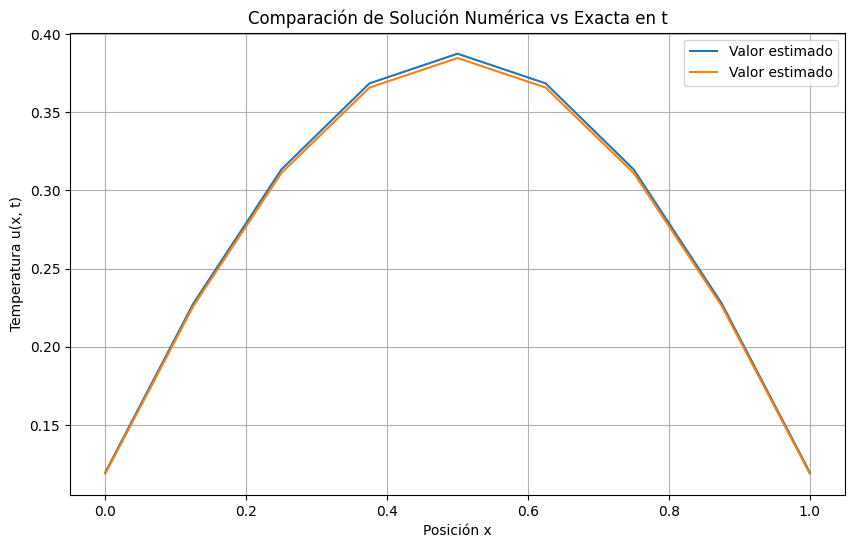

In [774]:
# Grafica
plt.figure(figsize=(10, 6))                           # Un tamaño de grafica de 10,6
plt.plot(x,v_es, label='Valor estimado')              # Valores del valor estimado
plt.plot(x,v_ex, label='Valor estimado')              # Valores del valor real
plt.title('Comparación de Solución Numérica vs Exacta en t')     # Titulo
plt.xlabel('Posición x')                              # Eje X
plt.ylabel('Temperatura u(x, t)')                     # Eje Y
plt.legend()                                          # Mostrar los titulos de las lineas
plt.grid()                                            # Mostrar la cuadricula
plt.show()                                            # Mostrar la grafica

En la grafica podemos observar que el valor exacto y el valor esperado son muy parecidos, esto indica que el metodo es mas eficiente que el Método de Richardson, ya que en 10 iteraciones su valor esta tendiendo al valor real.

---
<font size=2 color="blue">Determine el error de su solución.</font>

---

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$np.abs$ </font>Creamos una lista de valores absolutos

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$data_e$ </font> Guarda la lista de que contiene los valores exactos, valores esperados, y el error

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$zip$ </font> Nos permite unir las listas, para usar tabulate

&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">$headers$ </font> Son los encabezados, titulos de las columnas


In [772]:
# Error
error_abs = np.abs(np.array(v_ex) - np.array(v_es))                # Guardamos el valor de la diferecia entre los valores
data_e = list(zip(v_ex, v_es, error_abs))                          # Guardamos los valores en una lista de datos_error

print(tabulate(data_e,tablefmt="heavy_grid",headers=["Valor real", "Valor esperado", "Error"]))     # Imprimimos los datos

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃   Valor real ┃   Valor esperado ┃       Error ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.1189 ┃         0.119736 ┃ 0.000836007 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.2261 ┃         0.227748 ┃ 0.00164791  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.3112 ┃         0.313462 ┃ 0.00226218  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.3658 ┃         0.368491 ┃ 0.00269123  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.3847 ┃         0.387452 ┃ 0.00275235  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.3658 ┃         0.368491 ┃ 0.00269123  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.3112 ┃         0.313462 ┃ 0.00226218  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.2261 ┃         0.227748 ┃ 0.00164791  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃       0.1189 ┃         0.119736 ┃ 0.000836007 ┃
